In [1]:
import sys
from pathlib import Path

In [2]:
%load_ext autoreload
%autoreload 3 -p
%matplotlib inline

## imports

In [3]:
import torch
from torch import nn
from torchvision.transforms.functional import to_pil_image

In [4]:
import yolov1
from yolov1.config import parse_config

In [219]:
from yolov1.data.dataset import YOLODataset
from yolov1.utils.vis import draw_boxes_pil, draw_boxes_tensor

In [205]:
from yolov1.utils.general import decode_labels

In [28]:
import matplotlib.pyplot as plt

## config

In [127]:
config_path = "../../yolov1/src/yolov1/configs/default.yaml"

Reloading 'yolov1.config'.


In [128]:
config = parse_config(config_file=config_path)

config

YOLOConfig(data=DataConfig(root='/home/ajkdrag/workspace/projects/architectures-impl-pytorch/.data', train='valid', val='valid', names=['Ambulance', 'Bus', 'Car', 'Motorcycle', 'Truck'], augmentations=AugmentationsConfig(horizontal_flip=1.0, vertical_flip=0.0, brightness_contrast=0.8, shift_scale_rotate=0.0, random_crop=0.8, random_crop_dims=(224.0, 224.0))), training=TrainingConfig(batch_size=4, num_workers=4, learning_rate=0.001, epochs=2, checkpoints_dir='/home/ajkdrag/workspace/projects/architectures-impl-pytorch/checkpoints', save_freq=10), inference=InferenceConfig(batch_size=2, checkpoint='/home/ajkdrag/workspace/projects/architectures-impl-pytorch/checkpoints/final_epoch_50.pt', source='/home/ajkdrag/workspace/projects/architectures-impl-pytorch/.data/valid/images'), model=ModelConfig(backbone='resnet18', pretrained=True, backbone_output_channels=512, detector_hidden_sz=1024, input_size=(224, 224), conf_th=0.0, S=7, B=1, nc=5))

## dataset

In [251]:
train_ds = YOLODataset(config, mode="train", encode=True, apply_aug=True)

Reloading 'yolov1.utils.vis'.
2024-05-07T07:20:34.079197Z [info     ] Loaded 250 samples             func_name=get_data lineno=68


In [252]:
first = train_ds[2]

In [253]:
decoded = decode_labels(first[1], config.model.S, config.model.B, config.model.nc)

In [255]:
decoded.shape

torch.Size([1, 7])

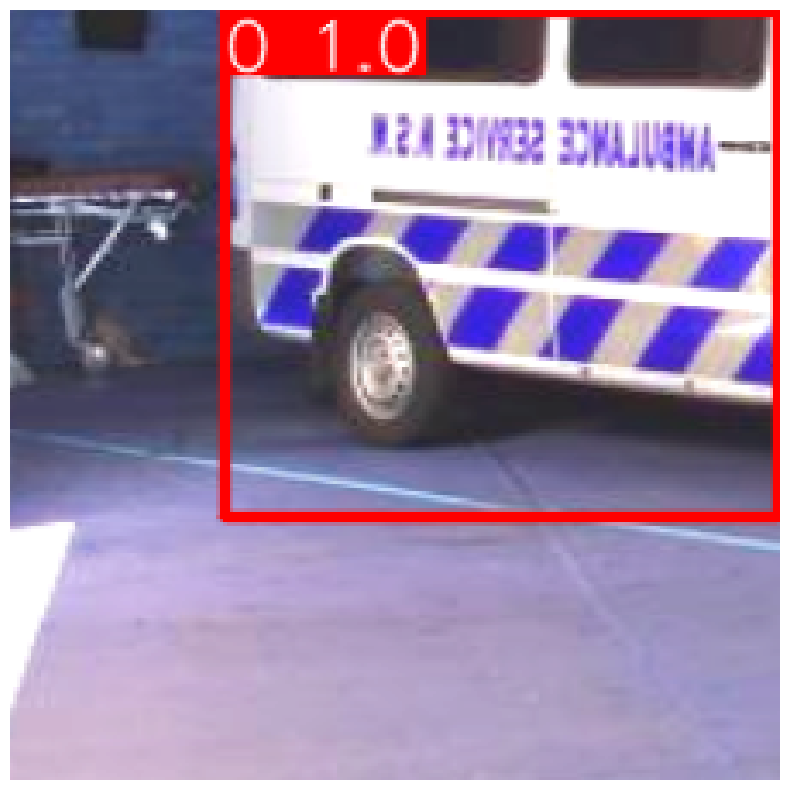

In [254]:
draw_boxes_tensor(first[0], decoded)